In [2]:
import yaml
import numpy as np
from bokeh.plotting import figure, show, output_notebook
output_notebook()

In [3]:
ds = list(yaml.load_all(open('../dataset/mouse-tiny'), yaml.Loader))
ds[0]

{'dimension_limit': [450, 450],
 'challenge': [[675, 1118], [-225, -668]],
 'answer': [{'milis': 1649345262097, 'point': [151, 74]},
  {'milis': 1649345262114, 'point': [151, 75]},
  {'milis': 1649345262131, 'point': [153, 77]},
  {'milis': 1649345262148, 'point': [172, 105]},
  {'milis': 1649345262165, 'point': [208, 149]},
  {'milis': 1649345262181, 'point': [244, 199]},
  {'milis': 1649345262198, 'point': [278, 247]},
  {'milis': 1649345262215, 'point': [318, 321]},
  {'milis': 1649345262232, 'point': [336, 357]},
  {'milis': 1649345262249, 'point': [345, 376]},
  {'milis': 1649345262266, 'point': [347, 380]},
  {'milis': 1649345262282, 'point': [346, 380]}]}

In [4]:
ds0 = ds[0]

In [12]:
width, height = ds0['dimension_limit']
grain = 100
x,y = np.meshgrid(np.linspace(0, width, grain),np.linspace(0, height, grain))

xy = np.stack([x,y], axis=-1)

uv = np.zeros_like(xy)

# def quiver(xy, uv):
#     plt.quiver(xy[...,0],xy[...,1], uv[...,0], uv[...,1])
uv.shape

(100, 100, 2)

In [13]:
p = figure()
p.dot(x.flatten(), y.flatten())
show(p)

In [14]:
def distance(A, B, P):
    """ segment line AB, point P, where each one is an array([x, y]) """
    
    from numpy import arccos, array, dot, pi, cross
    from numpy.linalg import det, norm

    if all(A == P) or all(B == P):
        return 0
    if arccos(dot((P - A) / norm(P - A), (B - A) / norm(B - A))) > pi / 2:
        return norm(P - A)
    if arccos(dot((P - B) / norm(P - B), (A - B) / norm(A - B))) > pi / 2:
        return norm(P - B)
    return norm(cross(A-B, A-P))/norm(B-A)

In [15]:
def distance_from_line(p0, p1, xy):
    p0=np.array(p0)
    p1=np.array(p1)
    dist = p1-p0
    if np.all(dist == [0, 0]):
        direction = dist
    else:
        direction = dist / np.sqrt(np.sum(dist*dist))
    assert direction.shape == (2, )
        
    # distance from point to line
    magnitude = np.apply_along_axis(lambda p:distance(p0, p1, p), 2, xy)
    
    # ret = magnitude.reshape((*magnitude.shape,1)) * direction.reshape((1, 1, 2))
    # assert ret.shape[2] == 2
    return magnitude, direction

def linear_band(mag00, max_dist):
    return np.where(mag00 < max_dist, max_dist-mag00, 0)


# quiver(xy, uv0)
# None

In [16]:
p0, p1= np.array([0, height]), np.array([width,0])
mag0, dir0 = distance_from_line(p0, p1, xy)


In [17]:
def plot_mag(x, y, size):
    p = figure()
    p.dot(x=x.flatten(), y=y.flatten(), size=size.flatten())
    show(p)
    
plot_mag(x, y, linear_band(mag0, 10))

In [18]:
xy.shape[0:-1]

(100, 100)

In [19]:
screen = np.zeros(xy.shape[0:-1])


In [62]:
points = [ans['point'] for ans in ds0['answer']]
screen = np.zeros(xy.shape[0:-1])
screen_dir = np.zeros(xy.shape)
for i in range(0, len(points)-1):
    p0=points[i]
    p1=points[i+1]
    mag, direction = distance_from_line(p0, p1, xy)
    mag = linear_band(mag, 10)
    screen = np.max([mag, screen], axis=0)
    screen_dir += mag.reshape((*mag.shape,1)) / 10.0 * direction.reshape((1, 1, 2))
plot_mag(x, y, screen)

In [30]:
#screen_dir = np.nan_to_num(screen_dir, 0)

/tmp/ipykernel_1608/2833403508.py:32: RuntimeWarning: invalid value encountered in true_divide
  return np.where(extend_1(len_squared > 1), uv / extend_1(len_), uv)


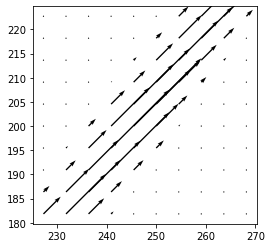

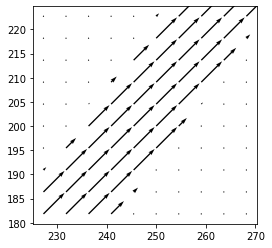

In [57]:
# bokeh has no arraw type
import matplotlib.pyplot as plt
def plot_dir(x, y, uv, factor=4):
    u, v = uv[...,0],uv[...,1]
    u = u.flatten()
    v = u.flatten()
    
    fig = plt.figure(figsize=plt.figaspect(1))
    plt.quiver(x, y, u, v)
    # p.diamond(x, y, size=u**2+v**2, angle = np.arctan2(v, u))
    # p.segment(x, y,
    #       x + factor * u,
    #       y + factor * v,
    #       line_cap = 'arrow',
    #       line_width = 4)
    # show(p)

# plot_dir(x.flatten(), y.flatten(), screen_dir)
idx = (slice(40,50),slice(50,60))
uv1 = screen_dir * screen.reshape((*screen.shape, 1))


uv1_normed = uv_norm(uv1)
                
plot_dir(x[idx].flatten(), y[idx].flatten(), uv1[idx])
plot_dir(x[idx].flatten(), y[idx].flatten(), uv1_normed[idx])


(array([154.,  28.,  22.,  11.,  15.,   6.,   4.,  12.,  11.,   6.,   3.,
          8.,   2.,   7.,   6.,   8.,   1.,   5.,   3.,   5.,   6.,   2.,
          6.,   5.,   3.,   2.,   2.,   2.,   1.,   2.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.39327756e-08, 3.81428028e+00, 7.62856055e+00, 1.14428408e+01,
        1.52571211e+01, 1.90714014e+01, 2.28856816e+01, 2.66999619e+01,
        3.05142422e+01, 3.43285224e+01, 3.81428027e+01, 4.19570830e+01,
        4.57713632e+01, 4.95856435e+01, 5.33999238e+01, 5.72142040e+01,
        6.10284843e+01, 6.4842

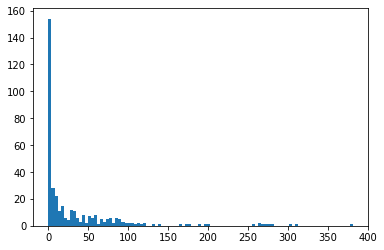

In [60]:
plt.hist(len_squared[len_squared != 0].flatten(), bins=100)

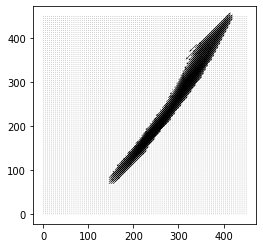

In [34]:
plot_dir(x.flatten(), y.flatten(), uv1_normed)


In [23]:
slice

slice

Signature:
plt.figure(
    num=None,
    figsize=None,
    dpi=None,
    facecolor=None,
    edgecolor=None,
    frameon=True,
    FigureClass=<class 'matplotlib.figure.Figure'>,
    clear=False,
    **kwargs,
)
Source:   
def figure(num=None,  # autoincrement if None, else integer from 1-N
           figsize=None,  # defaults to rc figure.figsize
           dpi=None,  # defaults to rc figure.dpi
           facecolor=None,  # defaults to rc figure.facecolor
           edgecolor=None,  # defaults to rc figure.edgecolor
           frameon=True,
           FigureClass=Figure,
           clear=False,
           **kwargs
           ):
    """
    Create a new figure, or activate an existing figure.

    Parameters
    ----------
    num : int or str or `.Figure`, optional
        A unique identifier for the figure.

        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string 